**COMP0120 Project Code - Support Vector Machines (SVMs)**

**John Duffy, Student Number: 19154676**

# Dataset

For this project I have decided to use the Iris dataset included with Scikit-Learn. This is a well studied dataset in the literature, so may appear a *boring* choice. However, it provides clean and multi-class data which can be used to validate my code against other well established code, such as Scikit-Learn.

In [1]:
# Import libraries common to whole project.

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load Iris dataset.

from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"]
y = iris["target"]
y_names = iris["target_names"]

# Introduction

## An Aside about Python and *lambda* expressions

In Python functions are first class citizens, which means just they can be passed to and returned from functions in the same manner as variables. This is simialr to MatLab function handles. And it is sometimes convenient, and clearer, to write a short function as a *lambda*, or an anonymous function, rather that a write a full function declaration. A *lambda* can be assigned to a variable, but it doesn't have to be.

For example:
```
def kernel_linear(xi, xj):
    return np.dot(xi, xj)
```
is the same as the following:
```
kernel_linear = lambda xi, xj: np.dot(xi, xj)
```
An example of using a *lambda* anonymously is as follows, which passes a kernel function as a parameter but without first assiging it to a variable:
```
classifier.train(X, y, lambda xi, xj: np.dot(xi, xj))
```
I have used this functionality throughout my code for clarity and brevity.

## Linear Binary Classification

Generate some images for my report.

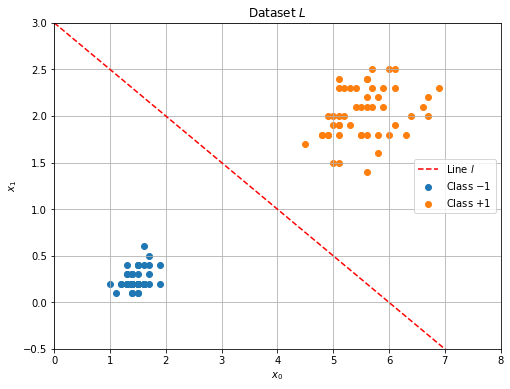

In [3]:
# intro_0.pdf

labels = ["Class $-1$", "Class $+1$"]
plt.figure(figsize=(8, 6))
plt.xlim(0, 8)
plt.ylim(-0.5, 3)
for i, value in enumerate([0, 2]):
    plt.scatter(X[y == value, 2], X[y == value, 3], label=labels[i])
x0 = np.arange(plt.xlim()[0], plt.xlim()[1], 0.01)
m = -0.5
c = 3.0
x1 = m * x0 + c
plt.plot(x0, x1, "--r", label="Line $l$")
plt.title("Dataset $L$")
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.legend(loc="center right")
plt.grid()
plt.savefig("intro_0.pdf")
plt.show()

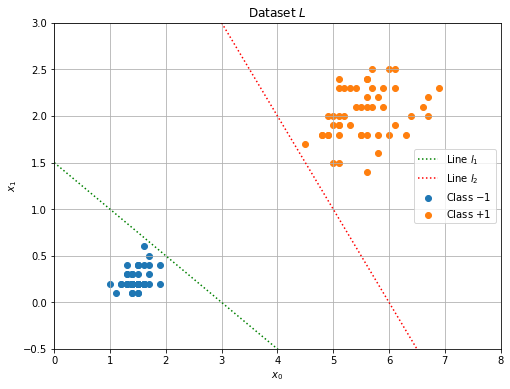

In [4]:
# intro_02.pdf

labels = ["Class $-1$", "Class $+1$"]
plt.figure(figsize=(8, 6))
plt.xlim(0, 8)
plt.ylim(-0.5, 3)
for i, value in enumerate([0, 2]):
    plt.scatter(X[y == value, 2], X[y == value, 3], label=labels[i])
x0 = np.arange(plt.xlim()[0], plt.xlim()[1], 0.01)
m = -0.5
c = 1.5
x1 = m * x0 + c
plt.plot(x0, x1, ":g", label="Line $l_1$")
x0 = np.arange(plt.xlim()[0], plt.xlim()[1], 0.01)
m = -1
c = 6
x1 = m * x0 + c
plt.plot(x0, x1, ":r", label="Line $l_2$")
plt.title("Dataset $L$")
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.legend(loc="center right")
plt.grid()
plt.savefig("intro_1.pdf")
plt.show()

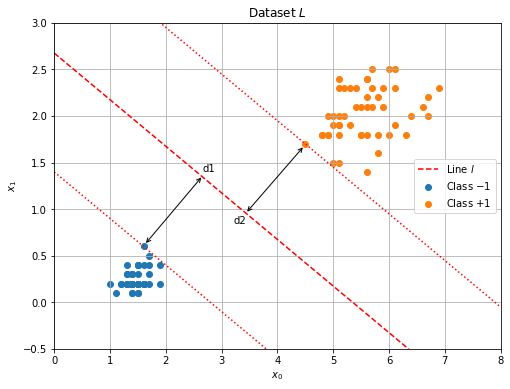

In [5]:
# intro_03.pdf

labels = ["Class $-1$", "Class $+1$"]

plt.figure(figsize=(8, 6))
plt.xlim(0, 8)
plt.ylim(-0.5, 3)

for i, value in enumerate([0, 2]):
    plt.scatter(X[y == value, 2], X[y == value, 3], label=labels[i])

x0 = np.arange(plt.xlim()[0], plt.xlim()[1], 0.01)
m = -0.5
c = 1.4
x1 = m * x0 + c
plt.plot(x0, x1, ":r")

x0 = np.arange(plt.xlim()[0], plt.xlim()[1], 0.01)
m = -0.5
c = 3.95
x1 = m * x0 + c
plt.plot(x0, x1, ":r")
x0 = np.arange(plt.xlim()[0], plt.xlim()[1], 0.01)
m = -0.5
c = 2.675
x1 = m * x0 + c
plt.plot(x0, x1, "--r", label="Line $l$")
plt.annotate("d1", xy=(1.62, 0.62), xytext=(2.65, 1.4), arrowprops=dict(arrowstyle="<->"))
plt.annotate("d2", xy=(4.48, 1.68), xytext=(3.21, 0.85), arrowprops=dict(arrowstyle="<->"))
plt.title("Dataset $L$")
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.legend(loc="center right")
plt.grid()
plt.savefig("intro_2.pdf")
plt.show()

# Mathematical Setting

## Linear Binary Classification

### Backtracking and Steepest Descent

In [41]:
# Steepest_descent and backtracking.

def backtracking(f, df, x, p, alpha0=1.0, rho=0.1, c1=1e-4):
    '''
    This function implements the backtracking algorithm. Note the use of
    lambda expressions to pass the f and df parameters. This function
    returns a Numpy array of the alpha iterations.
    '''
    alpha = alpha0
    alphas = [alpha]
    while f(x + alpha * p) > f(x) + c1 * alpha * np.dot(df(x), p):
        alpha = rho * alpha
        alphas.append(alpha)
    return np.array(alphas)

def steepest_descent(f, df, d2f, x0, tol=1e-6):
    '''
    This function implements the steepest descent algorithm. Note the use of
    lambda expressions to pass the f and df parameters. This function
    returns number of iterations and a Numpy array of the iterations steps.
    '''    
    x = x0
    xs = [x]
    i = 0
    while True:
        i += 1
        p = -1.0 * df(x)
        alphas = backtracking(f, df, x, p)
        x_1 = x
        x = x + alphas[-1] * p
        xs.append(x)
        if np.linalg.norm(x - x_1) / np.linalg.norm(x_1) < tol:
            break
    return (i, np.array(xs, dtype=np.float64))

### Rosenbrock Test (as per Assignment 1)

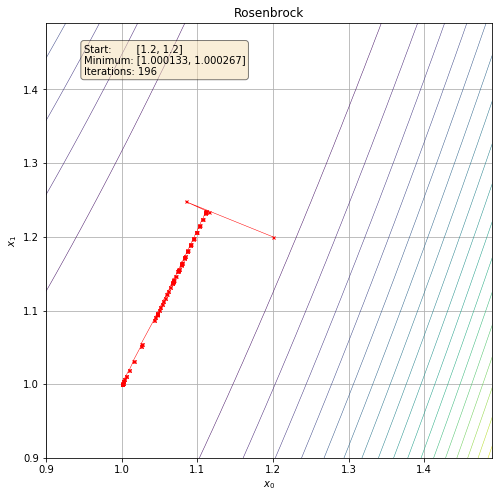

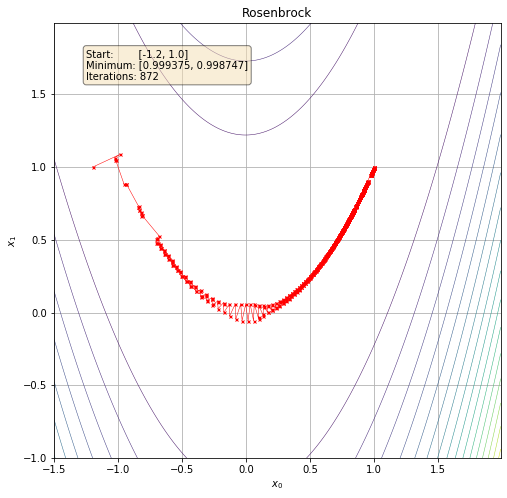

In [42]:
# Rosenbrock functionality test of backtracking and steepest descent.

a = 1
b = 100

f = lambda x: (a - x[0])**2 + b*(x[1] - x[0]**2)**2

df = lambda x: np.array([-2.0 * (a - x[0]) - 4.0 * b * x[0] * (x[1] - x[0]**2),
                         2.0 * b * (x[1] - x[0]**2)])

# rosenbrock_0.pdf

x0 = np.array([1.2, 1.2], dtype=np.float64)
iters, xs = steepest_descent(f, df, None, x0)

x = np.arange(0.9, 1.5, 0.01)
y = np.arange(0.9, 1.5, 0.01)
xx, yy = np.meshgrid(x, y)
z = (a - xx)**2 + b * (yy - xx**2)**2

plt.figure(figsize=(8, 8))
plt.contour(x,y,z, linewidths=0.5, levels=20)
plt.plot(xs[:, 0], xs[:, 1], '-rx', linewidth=0.5, markersize=3)
plt.title("Rosenbrock")
s1 = "Start:        [{:.1f}, {:.1f}]\n".format(x0[0], x0[1])
s2 = "Minimum: [{:.6f}, {:.6f}]\n".format(xs[-1][0], xs[-1][1])
s3 = "Iterations: {}".format(iters)
box_prop = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.95, 1.42, s1 + s2 + s3, bbox=box_prop)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.grid()
plt.savefig("rosenbrock_0.pdf")
plt.show()


# rosenbrock_1.pdf

x0 = np.array([-1.2, 1.0], dtype=np.float64)
iters, xs = steepest_descent(f, df, None, x0)

x = np.arange(-1.5, 2.0, 0.01)
y = np.arange(-1.0, 2.0, 0.01)
xx, yy = np.meshgrid(x, y)
z = (a - xx)**2 + b * (yy - xx**2)**2

plt.figure(figsize=(8, 8))
plt.contour(x,y,z, linewidths=0.5, levels=20)
plt.plot(xs[:, 0], xs[:, 1], '-rx', linewidth=0.5, markersize=3)
plt.title("Rosenbrock")
s1 = "Start:        [{:.1f}, {:.1f}]\n".format(x0[0], x0[1])
s2 = "Minimum: [{:.6f}, {:.6f}]\n".format(xs[-1][0], xs[-1][1])
s3 = "Iterations: {}".format(iters)
box_prop = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(-1.25, 1.6, s1 + s2 + s3, bbox=box_prop)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.grid()
plt.savefig("rosenbrock_1.pdf")
plt.show()

## SVM Implementation

The following code implements an SVM for linear binary classification. Note how the *linear_kernel* is written as *lambda* expression and passed to the *dual_solver_...()* functions as a parameter. This will make it easy to pass different kernels to the same solver. And also note now the *dual_solver_...()* functions are passed to the *svm()* function as a parameter. Again, this makes it easy to pass different *dual_solver* functionality to the SVM.

In [43]:
# Kernel functions.

linear_kernel = lambda xi, xj: np.dot(xi, xj)

In [91]:
# SVM implementation.

def quadratic_penalty_dual_solver(X, y, kernel, descent_function, x0=np.array([10.0, 10.0]), mu=500):
    '''
    This function...
    '''
    L = len(X)
    
    H = np.zeros((L, L))
    for i in range(L):
        for j in range(L):
            H[i, j] = y[i] * y[j] * kernel(X[i], X[j])            

    f   = lambda x: 0.5 * x @ H @ x - np.sum(x) + 0.5 * mu * (x @ y)**2
    df  = lambda x: H @ x - np.ones(len(x)) + mu * y * (x @ y)
    d2f = H # TODO: Check now that constraint is included.

    iters, xs = descent_function(f, df, None, x0)

    return (iters, xs)


#def dual_solver_kkt_system(X, y, kernel):
#    L = len(X)
#    P = np.zeros((L, L))
#    for i in range(L):
#        for j in range(L):
#            P[i, j] = y[i] * y[j] * kernel(X[i], X[j])
#    q = np.full((L), -1.0)
#    A = y
#    KKT = np.zeros((L + 1, L + 1))
#    KKT[0:L, 0:L] = P
#    KKT[L, 0:L] = A
#    KKT[0:L, L] = A
#    RHS = np.zeros((L + 1))
#    RHS[0:L] = -1.0 * q
#    return np.linalg.solve(KKT, RHS)[0:L]


def sv_func(X, alphas):
    return (X[np.where(alphas > 0.0)])


def w_func(X, y, alphas):
    M, N = X.shape
    w = np.zeros((N))
    for i in range(M):
        w += alphas[i] * y[i] * X[i]
    return w


def margin_func(w):
    return 1.0 / np.linalg.norm(w)


def b_func(X, y, alphas):
    b = 0.0
    S = np.argwhere(alphas > 0.0)
    for i in np.nditer(S):
        inner = 0.0
        for j in np.nditer(S):
            inner += alphas[j] * y[j] * np.dot(X[j], X[i])
        b += y[i] - inner
    return b / len(S)


class SVM(object):
    
    def __init__(self):
        pass
    
    def train(self, X, y, kernel, dual_solver, descent_method):
        '''
        This method...
        '''
        self.iters, self.xs = dual_solver(X, y, kernel, descent_method)
        self.alphas         = self.xs[-1]        
        self.sv             = sv_func(X, self.alphas)        
        self.w              = w_func(X, y, self.alphas)        
        self.b              = b_func(X, y, self.alphas)
        self.margin         = 1.0 / np.linalg.norm(self.w)
        return
        
    def predict(self, x):
        return np.sign(self.w @ x + self.b)


## SVM Functionality Test

In [92]:
X = np.array([[1.0, 1.0],
              [3.0, 3.0]])

y = np.array([-1.0, +1.0])


svm = SVM()

svm.train(X, y, linear_kernel, quadratic_penalty_dual_solver, steepest_descent)

print(svm.iters)
print(svm.xs)
print(svm.alphas)
print(svm.sv)
print(svm.w)
print(svm.b)
print(svm.margin)

77
[[10.         10.        ]
 [10.041       9.881     ]
 [ 6.0614      6.2198    ]
 [ 6.166796    6.066012  ]
 [ 3.633844    3.986468  ]
 [ 3.82780712  3.76120264]
 [ 3.65390074  3.65687699]
 [ 3.67102232  3.61248848]
 [ 2.27761885  2.3393147 ]
 [ 2.31894743  2.28102483]
 [ 1.42764274  1.5626787 ]
 [ 1.5026815   1.47659836]
 [ 1.44080804  1.44138728]
 [ 1.44786437  1.42479754]
 [ 0.9598285   0.98222211]
 [ 0.97599898  0.96010428]
 [ 0.66212662  0.7122511 ]
 [ 0.69113811  0.6793411 ]
 [ 0.66909075  0.66751305]
 [ 0.6719688   0.66130121]
 [ 0.5009764   0.50751968]
 [ 0.5072912   0.49911854]
 [ 0.39667104  0.41371294]
 [ 0.40788092  0.40112518]
 [ 0.4000121   0.39717422]
 [ 0.40117618  0.3948441 ]
 [ 0.34124319  0.34143465]
 [ 0.34370504  0.33824055]
 [ 0.33980294  0.33530199]
 [ 0.33988467  0.33455584]
 [ 0.30620004  0.30272733]
 [ 0.30666765  0.30185179]
 [ 0.28565241  0.28331194]
 [ 0.28661074  0.28209647]
 [ 0.28523298  0.28108709]
 [ 0.28527609  0.28081186]
 [ 0.27349667  0.26972748

In [101]:
svm.predict(np.array([2.5, 2.5]))

1.0

### Functionality Test

In [46]:
X = np.array([[1.0, 1.0],
              [5.0, 3.0]])

y = np.array([-1.0, +1.0])

L = len(X)
H = np.zeros((L, L))
for i in range(L):
    for j in range(L):
        H[i, j] = y[i] * y[j] * kernel_linear(X[i], X[j])            

print(H)


f  = lambda x: 0.5 * x @ H @ x - np.sum(x)
df = lambda x: H @ x - np.ones(len(x))

x0 = np.array([10.0, 10.0])

iters, xs = steepest_descent(f, df, None, x0)
print(iters)
print(xs[-1])


[[ 2. -8.]
 [-8. 34.]]
1251
[10.50588387  2.50137457]


In [ ]:
f = lambda x : x[0]**2 + 17 * x[1]**2 - 8.0 * x[0] * x[1] - x[0] - x[1]

df = lambda x : np.array([2.0 * x[0] - 8.0 * x[1] - 1.0,
                          34.0 * x[1] - 8.0 * x[0] - 1.0])

#f = lambda x: 0.5 * x @ H @ x - np.sum(x)
    
#df = lambda x: (np.transpose(H) + H) @ x - np.ones(len(x))



                     
x0 = np.array([10.0, 10.0], dtype=np.float64)

iters, xs = steepest_descent(f, df, x0)

x = np.arange(-2.0, 14.0, 0.01)
y = np.arange(-2.0, 14.0, 0.01)
xx, yy = np.meshgrid(x, y)
z = xx**2 + 17.0 * yy**2 - 8.0 * xx * yy - xx - yy

plt.figure(figsize=(8, 8))
cs = plt.contour(x,y,z, linewidths=0.5)
plt.clabel(cs)
plt.plot(xs[:, 0], xs[:, 1], '-ro', linewidth=0.5, markersize=3)
s1 = "Start:        [{:.1f}, {:.1f}]\n".format(x0[0], x0[1])
s2 = "Minimum: [{:.6f}, {:.6f}]\n".format(xs[-1][0], xs[-1][1])
s3 = "Iterations: {}".format(iters)
box_prop = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(-1.6, 12.4, s1 + s2 + s3, bbox=box_prop)
plt.grid()
plt.savefig("motiv_0.pdf")
plt.show()

In [76]:
a=np.array([1,2])
b=np.array([1,2])
a@b

5

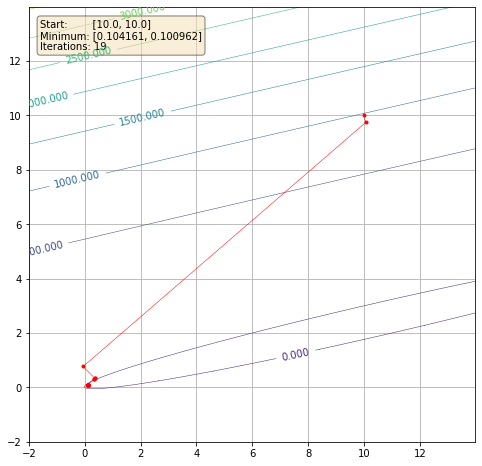

In [70]:
# Quadratic Penalty Method for solving the Dual Problem.

mu = 500

f = lambda x : x[0]**2 + 17 * x[1]**2 - 8.0 * x[0] * x[1] - x[0] - x[1] + mu / 2.0 * (-1.0 * x[0] + 1.0 *x[1])**2

df = lambda x : np.array([2.0 * x[0] - 8.0 * x[1] - 1.0 - mu * (-1.0 * x[0] + 1.0 * x[1]),
                          34.0 * x[1] - 8.0 * x[0] - 1.0 + mu * (-1.0 * x[0] + 1.0 * x[1])])



x0 = np.array([10.0, 10.0])

iters, xs = steepest_descent(f, df, x0)

alphas = xs[-1]

x = np.arange(-2.0, 14.0, 0.01)
y = np.arange(-2.0, 14.0, 0.01)
xx, yy = np.meshgrid(x, y)
z = xx**2 + 17.0 * yy**2 - 8.0 * xx * yy - xx - yy

plt.figure(figsize=(8, 8))
cs = plt.contour(x,y,z, linewidths=0.5)
plt.clabel(cs)
plt.plot(xs[:, 0], xs[:, 1], '-ro', linewidth=0.5, markersize=3)
s1 = "Start:        [{:.1f}, {:.1f}]\n".format(x0[0], x0[1])
s2 = "Minimum: [{:.6f}, {:.6f}]\n".format(xs[-1][0], xs[-1][1])
s3 = "Iterations: {}".format(iters)
box_prop = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(-1.6, 12.4, s1 + s2 + s3, bbox=box_prop)
plt.grid()
plt.savefig("motiv_1.pdf")
plt.show()

In [ ]:
support_vectors = X[alphas > 0.0]  # np.finfo(np.float64).eps

In [ ]:
alphas

In [ ]:
support_vectors

In [ ]:
np.finfo(np.float64).eps

In [ ]:
b = np.zeros((3))

In [ ]:
b

In [ ]:
from scipy.optimize import minimize

rosen = lambda x: (1.0 - x[0])**2.0 + 100.0 * (x[1]-x[0]**2.0)**2.0

f = lambda x: x[0]**2.0 + 17.0 * x[1]**2.0 - 8.0 * x[0] * x[1] - x[0] - x[1]

eq_cons = {'type': 'eq', 'fun' : lambda x: np.array(x[1] - x[0])}

ineq_cons = {'type': 'ineq', 'fun' : lambda x: np.array(x[0], x[1])}

x0 = np.array([10.0, 10.0])

minimize(f, x0, method='SLSQP', constraints=[eq_cons, ineq_cons], options={'ftol': 1e-6})

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC(C=1)

X = np.array([[1.0, 1.0],
              [5.0, 3.0]])

y = np.array([-1.0, +1.0])
              
svm.fit(X, y)


In [ ]:
svm.predict([[1.0, 7.0]])